In [108]:
import math
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [109]:
#DEFINIR EL INTERVALO Y EL ERROR A USAR
a = 0
b = 1
error = 0.01

In [110]:
#definir la función a la que se le buscará la raíz
def f(x):
    return 5 * x**3 - 5 **2 + 6 * x -2 #puedes modificar esto para encontrar la raíz de otra función

In [111]:
#BISECCIÓN.
#definir el método de bisección.
def biseccion(a, b, err):
    i = 0
    puntos = []
    
    if f(a) * f(b) > 0:
        print("No hay raíz en este intervalo")
        return puntos
    e = abs(b - a) / 2
    while e > err:
        e = abs(b - a) / 2
        m = (a + b) / 2
        puntos.append(m)
        
        if f(a) * f(m) < 0:
            b = m
        else:
            a = m
        
        i += 1
        
        print("ITERACIÓN: ", i, "\nRaiz: ", m, "\nIntervalo: ", '[',a, ",", b,']', "\nError: ", (e)*100, "%\n")
    
    print('La raíz aproximada es: x',i, ' = ', m)
    return puntos

pm_biseccion = biseccion(a, b, error)

No hay raíz en este intervalo


In [ ]:
def reglaFalsa(a, b, err, imax=250):
    solucion = None
    i = 0
    error_calculado = 100
    puntos = []
    
    if f(a) * f(b) > 0:
        print("No hay raíz en este intervalo.")
        return puntos
    
    while i <= imax and error_calculado >= err:
        i += 1
        if abs(f(b) - f(a)) < 1e-12:  # Evitar división por 0 (usar un valor razonable)
            print("División por cero detectada. No se puede continuar.")
            return puntos
        
        solucion = b - ((f(b) * (b - a)) / (f(b) - f(a)))
        error_calculado = abs((solucion - a)) 
        
        puntos.append(solucion)
        
        if f(a) * f(solucion) >= 0:
            a = solucion
        else:
            b = solucion
        
        print(f"ITERACIÓN: {i} \nRaíz: {solucion} \nIntervalo: [{a}, {b}] \nError: {error_calculado}%\n")
    
    if i > imax:
        print("Se alcanzó el número máximo de iteraciones sin converger.")
    else:
        print(f'La raíz aproximada es: x = {solucion}')
    
    return puntos

# Llamada de prueba
puntos_rf = reglaFalsa(a, b, error, imax=1500)

ITERACIÓN: 1 
Raíz: 2.4545454545454546 
Intervalo: [0, 2.4545454545454546] 
Error: 2.4545454545454546%

ITERACIÓN: 2 
Raíz: 0.7474262182566918 
Intervalo: [0.7474262182566918, 2.4545454545454546] 
Error: 0.7474262182566918%

ITERACIÓN: 3 
Raíz: 1.1722056685562614 
Intervalo: [1.1722056685562614, 2.4545454545454546] 
Error: 0.42477945029956965%

ITERACIÓN: 4 
Raíz: 1.3798255771589105 
Intervalo: [1.3798255771589105, 2.4545454545454546] 
Error: 0.20761990860264912%

ITERACIÓN: 5 
Raíz: 1.4690851865253076 
Intervalo: [1.4690851865253076, 2.4545454545454546] 
Error: 0.0892596093663971%

ITERACIÓN: 6 
Raíz: 1.5050004737016458 
Intervalo: [1.5050004737016458, 2.4545454545454546] 
Error: 0.035915287176338184%

ITERACIÓN: 7 
Raíz: 1.5190428603102974 
Intervalo: [1.5190428603102974, 2.4545454545454546] 
Error: 0.014042386608651647%

ITERACIÓN: 8 
Raíz: 1.5244701555671272 
Intervalo: [1.5244701555671272, 2.4545454545454546] 
Error: 0.005427295256829723%

La raíz aproximada es: x = 1.524470155567

In [113]:
#SECANTE
def secante(a, b, err):
    i = 0
    e = 101
    c = 0
    puntos = []
    
    if f(a) * f(b) > 0:
        print("No hay raíz en este intervalo.")
        return puntos
    
    while e > err:
        c = a - ((f(a) * (a - b)) / (f(a) - f(b)))
        a = b
        b = c
        puntos.append(c)
        e = abs(f(c))
        i += 1
        print("ITERACIÓN: ", i, "\nRaiz: ", c, "\nIntervalo: ", '[', a, ",", b, ']', "\nError: ", e * 100, "%\n")
    
    print('La raíz aproximada es: x', i, ' = ', c)
    return puntos
puntos_secante = secante(a, b, error)

No hay raíz en este intervalo.


In [114]:
# NEWTON - RAPHSON
x = sp.Symbol('x')
f_sym = sp.exp(3*x) - 4
df_sym = sp.diff(f_sym, x)  # Derivada de la función f(x)
df = sp.lambdify(x, df_sym)  # Convertir la derivada simbólica en una función numérica

# Elegir el punto inicial x0 como 'a' o 'b' dependiendo de cuál esté más cerca de la raíz
x = a if abs(f(a)) < abs(f(b)) else b

def newton_raphson(x, err, imax=250):
    i = 0
    puntos = []
    
    while i <= imax:
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:
            print("Derivada cero. No se puede continuar.")
            return puntos
        
        x_new = x - fx / dfx
        puntos.append(x_new)
        
        e = (x_new - x) / x_new
        if abs(e) < err:
            print(f"La raíz aproximada es: x_{i} = {x_new}")
            return puntos
        
        x = x_new
        i += 1
        print("ITERACIÓN: ", i, "\nRaiz: ", x, "\nError: ", e * 100, "%\n")
    
    print("Se alcanzó el número máximo de iteraciones sin converger.")
    return puntos

# Llamar al método de Newton-Raphson
puntos_nr = newton_raphson(x, error)

ITERACIÓN:  1 
Raiz:  1.2655310312952743 
Error:  20.981787465417 %

ITERACIÓN:  2 
Raiz:  1.334912367103646 
Error:  5.197444979771077 %

ITERACIÓN:  3 
Raiz:  1.3780333584901614 
Error:  3.129168907330427 %

ITERACIÓN:  4 
Raiz:  1.4081857057692735 
Error:  2.1412195249234016 %

ITERACIÓN:  5 
Raiz:  1.4305666064025837 
Error:  1.564478055977485 %

ITERACIÓN:  6 
Raiz:  1.4477971781291623 
Error:  1.1901233119437267 %

La raíz aproximada es: x_6 = 1.461393531334458


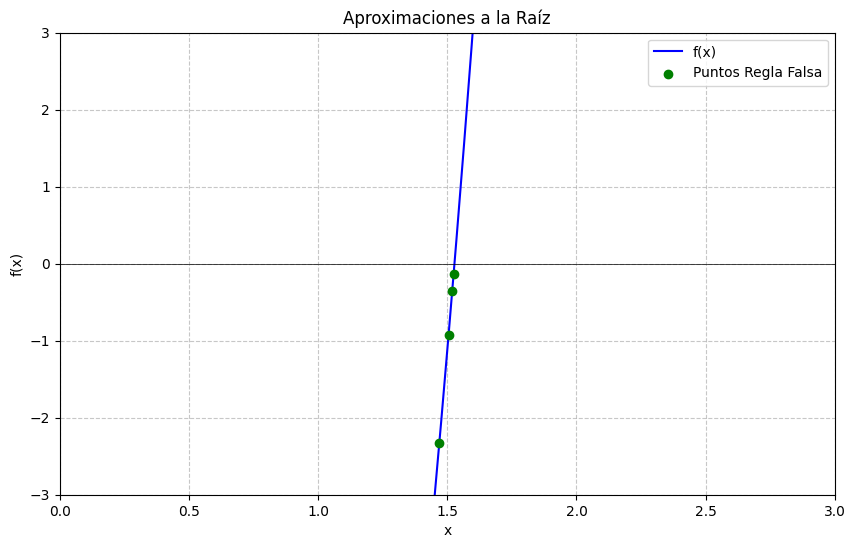

In [115]:
#GRÁFICA DE PUNTOS
f_vectorized = np.vectorize(f)
x_vals = np.linspace(0.1, 3, 100)  # Start from 0.1 to avoid log(0)
y_vals = f_vectorized(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')
#plt.scatter(pm_biseccion, [f(p) for p in pm_biseccion], color='red', label='Puntos Bisección', zorder=5)
plt.scatter(puntos_rf, [f(p) for p in puntos_rf], color='green', label='Puntos Regla Falsa', zorder=5)
#plt.scatter(puntos_secante, [f(p) for p in puntos_secante], color='orange', label='Puntos Secante', zorder=5)
#plt.scatter(puntos_nr, [f(p) for p in puntos_nr], color='purple', label='Puntos Newton-Raphson', zorder=5)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0, 3)
plt.ylim(-3, 3)
plt.title('Aproximaciones a la Raíz')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()